In [0]:
from PIL import Image
import numpy as np
import os
import sys

In [0]:
import glob  #file pattern matching


In [0]:
#to resize all the images to 150*150 size
width=150
height=150
img_num=0
for filename in glob.glob('Images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    im=Image.open(filename).convert('L')#pillow to load image and convert to greyscale image
    out=im.resize((width,height),Image.ANTIALIAS)
    out.save("C:/Users/pramo/Downloads/face-to-bmi/Data/Resize_images/img_{}.bmp".format(img_num))
    img_num+=1

In [0]:
image_list=[]
for img_nu in range(0,4206):
    st=str(img_nu)
    im=Image.open('Resized_images/img_'+st+'.bmp')
    image_list.append(im)#adding images to image_list

In [0]:
len(image_list)

4206

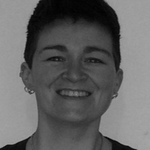

In [0]:
image_list[67]

In [0]:
#to convert images to array=>1d array=>2d array 
#appending all the image vectors to X_img vector
temp=1
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    arr_1d=arr.flatten()#to convert into 1D array
    arr_2d=arr_1d.reshape(1,22500) #to convert 1D to 2D array
    if(temp==1):
        X_img=arr_2d
        temp=0
    else:
        X_img=np.append(X_img,arr_2d,axis=0)#to add new rows to the X_image data

In [0]:
X_img.shape

(4206, 22500)

In [0]:
#standardising data(setting mean=0,variance=1)
from sklearn.preprocessing import StandardScaler

In [0]:
X_P_img=StandardScaler().fit_transform(X_img)

C:\Users\pramo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
from sklearn.decomposition import PCA

In [0]:
#princinple components choosen should be 95% of variance
pca=PCA(.95)

In [0]:
#to find out principle components from X_P_img
pca.fit(X_P_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
#no:of principle components
pca.n_components_

355

In [0]:
X_P_img=pca.transform(X_P_img)

In [0]:
X_P_img.shape

(4206, 355)

In [0]:
import pandas as pd
#to read_csv file
data_unclean=pd.read_csv('data.csv')
#to show top 5rows
data_unclean.head()

,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [0]:
#to remove unnamed coloums in data
data=data_unclean.loc[:,~data_unclean.columns.str.contains('^Unnamed')]
data.head()

,bmi,gender,is_training,name
0,34.207396,Male,1,img_0.bmp
1,26.453720,Male,1,img_1.bmp
2,34.967561,Female,1,img_2.bmp
3,22.044766,Female,1,img_3.bmp
4,37.758789,Female,1,img_4.bmp


In [0]:
#should include is_training?
x_train=data.loc[:,['gender']]
x_train.head()

,gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [0]:
from sklearn.preprocessing import LabelEncoder#to convert categorical data to numerical data(gender col)

In [0]:
number=LabelEncoder()

In [0]:
x_train=number.fit_transform(x_train['gender'].astype('str'))

In [0]:
x_train=x_train.reshape(4206,1)

In [0]:
y_train=data.loc[:,['bmi']]
y_train=np.array(y_train)
y_train.shape

(4206, 1)

In [0]:
X_train=np.append(x_train,X_P_img,axis=1)
X_train.shape

(4206, 356)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [0]:
X_train.shape

(3364, 356)

In [0]:
y_train.shape


(3364, 1)

In [0]:
#pd.DataFrame(X_train)

In [0]:
X_test.shape

(842, 356)

In [0]:
X_train.shape

(3364, 356)

In [0]:
y_train=y_train.reshape(3364,)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [0]:
param_grid={'max_depth':range(2,16,2),#depth of the tree 
            'min_samples_split':range(2,16,2)}#noof samples to be consider at leaf node means to stop splitting at specified number

tree=DecisionTreeRegressor()
grid_search=GridSearchCV(tree,param_grid)
model=grid_search.fit(X_train,y_train)
print(model.best_params_)

{'max_depth': 2, 'min_samples_split': 12}


In [0]:
#best parameters are max_depth=2,min_samples_split=10
tree=DecisionTreeRegressor(max_depth=2,min_samples_split=10)

In [0]:
model=tree.fit(X_train,y_train)

In [0]:
prediction=model.predict(X_test)

In [0]:
MSE=mean_squared_error(prediction,y_test)

In [0]:
MAE=mean_absolute_error(prediction,y_test)

In [0]:
score=model.score(X_test,y_test)

In [0]:
print("Mean sqaure error={} , R2_score={},MAE={}".format(MSE,score,MAE))

Mean sqaure error=69.0152814232687 , R2_score=0.011034340218484262,MAE=6.607983700724628


In [0]:
pyplot.scatter(y_test,prediction)
pyplot.ylabel('predicted')
pyplot.xlabel('true values')

In [0]:
def export_prediction_Dt():
    return prediction

In [0]:
s=export_prediction_Dt()